<a href="https://colab.research.google.com/github/vaishnavisureshbabu010905/ml-lab/blob/main/ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

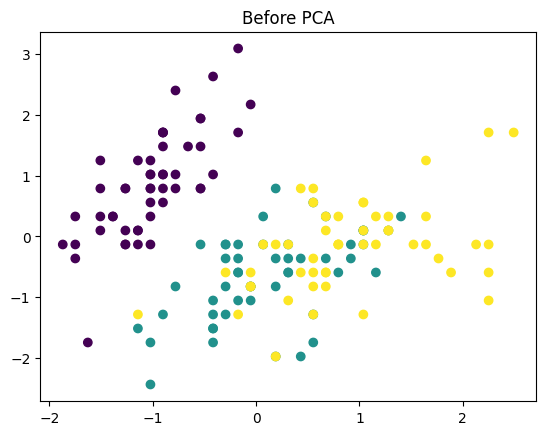

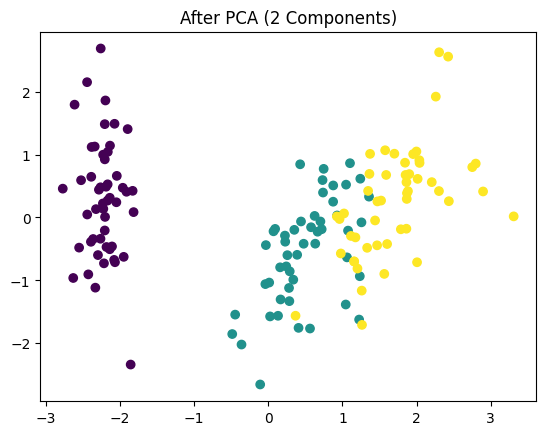

Logistic Regression Accuracy: Before PCA = 1.0 , After PCA = 0.9
KNN Accuracy: Before PCA = 1.0 , After PCA = 0.9333333333333333


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and scale data
iris = load_iris()
X, y = iris.data, iris.target
X_scaled = StandardScaler().fit_transform(X)

# Visualize before PCA
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.title("Before PCA")
plt.show()

# Apply PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize after PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("After PCA (2 Components)")
plt.show()

# Split and classify
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca = pca.transform(X_train), pca.transform(X_test)

# Logistic Regression
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)
acc_logr_before = accuracy_score(y_test, logr.predict(X_test))

logr.fit(X_train_pca, y_train)
acc_logr_after = accuracy_score(y_test, logr.predict(X_test_pca))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc_knn_before = accuracy_score(y_test, knn.predict(X_test))

knn.fit(X_train_pca, y_train)
acc_knn_after = accuracy_score(y_test, knn.predict(X_test_pca))

print("Logistic Regression Accuracy: Before PCA =", acc_logr_before, ", After PCA =", acc_logr_after)
print("KNN Accuracy: Before PCA =", acc_knn_before, ", After PCA =", acc_knn_after)


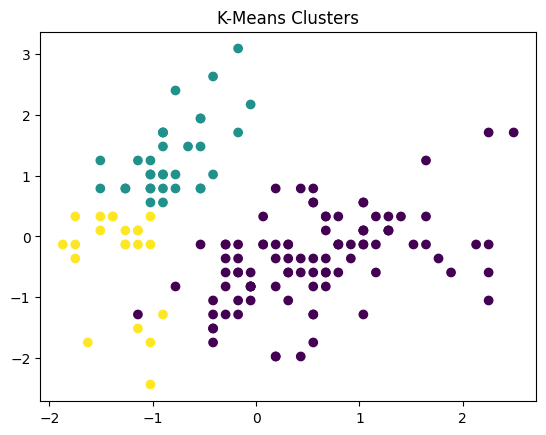

Confusion Matrix (K-Means vs True Labels):
[[ 0 33 17]
 [46  0  4]
 [50  0  0]]


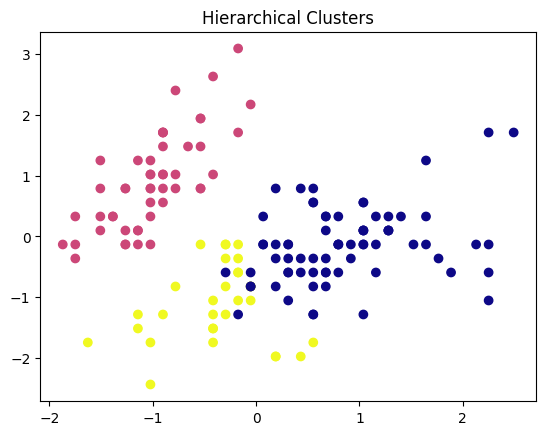

Confusion Matrix (Hierarchical vs True Labels):
[[ 0 49  1]
 [23  0 27]
 [48  0  2]]


In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clusters")
plt.show()

print("Confusion Matrix (K-Means vs True Labels):")
print(confusion_matrix(y, kmeans_labels))

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hc_labels, cmap='plasma')
plt.title("Hierarchical Clusters")
plt.show()

print("Confusion Matrix (Hierarchical vs True Labels):")
print(confusion_matrix(y, hc_labels))


In [4]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 3.0 MB/s eta 0:00:00


In [9]:
# --------------------------------------------------------------
# Q3: HMM Weather Prediction using hmmlearn (latest version fix)
# --------------------------------------------------------------

from hmmlearn import hmm
import numpy as np

# -------------------------------
# Define states and observations
# -------------------------------
states = ["Rainy", "Sunny"]
n_states = len(states)

observations = ["Walk", "Shop", "Clean"]
n_observations = len(observations)

# -------------------------------
# Define model probabilities
# -------------------------------
start_probability = np.array([0.6, 0.4])  # Initial probabilities
transition_probability = np.array([
    [0.7, 0.3],  # From Rainy → [Rainy, Sunny]
    [0.4, 0.6]   # From Sunny → [Rainy, Sunny]
])
emission_probability = np.array([
    [0.1, 0.4, 0.5],  # Rainy emits [Walk, Shop, Clean]
    [0.6, 0.3, 0.1]   # Sunny emits [Walk, Shop, Clean]
])

# -------------------------------
# Build the HMM model
# -------------------------------
# NOTE: n_trials=1 is now required for categorical-like behavior.
model = hmm.MultinomialHMM(
    n_components=n_states,
    n_trials=1,
    init_params=""  # Prevent auto-reset of probabilities
)

model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# -------------------------------
# Observation sequence: Walk, Shop, Clean
# -------------------------------
# Encoding observations: Walk=0, Shop=1, Clean=2
# MultinomialHMM expects observations as counts or one-hot encoding
obs_seq = np.array([[1, 0, 0],  # Walk
                      [0, 1, 0],  # Shop
                      [0, 0, 1]]) # Clean


# -------------------------------
# 1️⃣ Viterbi Algorithm
# -------------------------------
logprob_viterbi, state_sequence = model.decode(obs_seq, algorithm="viterbi")
decoded_states = [states[i] for i in state_sequence]

print("Most likely state sequence (Viterbi):", decoded_states)
print("Log Probability (Viterbi):", logprob_viterbi)

# -------------------------------
# 2️⃣ Forward Algorithm
# -------------------------------
# The Forward algorithm gives total log likelihood of observations.
logprob_forward = model.score(obs_seq)
print("Log Probability (Forward):", logprob_forward)

# -------------------------------
# Interpretation
# -------------------------------
print("\n✅ Observation:")
print("- Viterbi Algorithm gives the most likely sequence of hidden states.")
print("- Forward Algorithm gives the overall probability of the observation sequence.")
print("- Both probabilities may match in log-scale, but Viterbi decodes the actual path.")

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Most likely state sequence (Viterbi): ['Sunny', 'Rainy', 'Rainy']
Log Probability (Viterbi): -4.309519943887134
Log Probability (Forward): -3.3928721329161653

✅ Observation:
- Viterbi Algorithm gives the most likely sequence of hidden states.
- Forward Algorithm gives the overall probability of the observation sequence.
- Both probabilities may match in log-scale, but Viterbi decodes the actual path.


In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

logr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hard voting
hard_vote = VotingClassifier(estimators=[('lr', logr), ('dt', dt), ('svm', svm)], voting='hard')
hard_vote.fit(X_train, y_train)
acc_hard = accuracy_score(y_test, hard_vote.predict(X_test))

# Soft voting
soft_vote = VotingClassifier(estimators=[('lr', logr), ('dt', dt), ('svm', svm)], voting='soft')
soft_vote.fit(X_train, y_train)
acc_soft = accuracy_score(y_test, soft_vote.predict(X_test))

print("Hard Voting Accuracy:", acc_hard)
print("Soft Voting Accuracy:", acc_soft)


Hard Voting Accuracy: 1.0
Soft Voting Accuracy: 1.0


Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


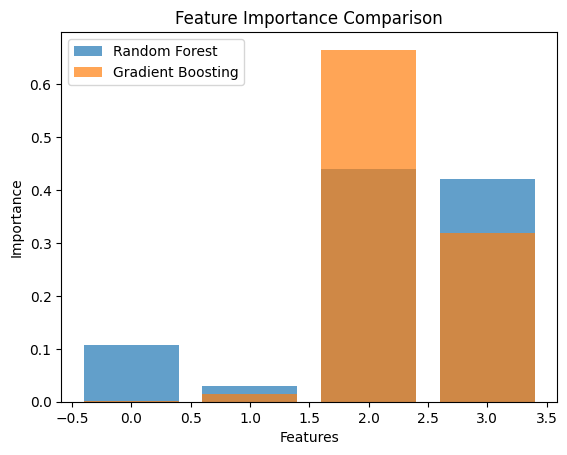

In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

print("Random Forest Accuracy:", rf.score(X_test, y_test))
print("Gradient Boosting Accuracy:", gb.score(X_test, y_test))

# Feature importance
plt.figure()
plt.bar(range(4), rf.feature_importances_, label='Random Forest', alpha=0.7)
plt.bar(range(4), gb.feature_importances_, label='Gradient Boosting', alpha=0.7)
plt.title("Feature Importance Comparison")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.legend()
plt.show()
